# Data Exploration

In any data modeling exercise, it  is good to have a basic understanding of 
the data characteristics and ensure that it is inline with our expectations. 

In particular, the main items of interest to look for include:

+ Size and schema
    * number of  instances and features
    * feature names and data types (numeric, ordinal, categorical, text)    
+ Univariate feature and target summaries
    * distributional properties of features 
    * skew in target distribution
    * prevalence of missing, outlier, or junk values
+ Target-feature dependencies
    * distributional properties of features conditioned on the target
    

Today we will focus on feature representation and visual exploration.
    
    

In [2]:
# Essential packages

# This line enables inline plots within jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [3]:
# Let's start with data loading
# Here I will use Boston house prices dataset. It is available through sklearn datasets.
# You can also download it from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

## otherwise 
# df = pd.read_csv('housing_dataset.csv', header=True)

## Size and Schema

First, we will try to get a sense of the size and the column types

In [4]:
# data size
df.shape

(506, 14)

In [5]:
# data schema
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [6]:
# top few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# summary of the data
df.describe(include='all',percentiles=[])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Bar charts

##### Bar chart is a simple way to describe the frequency distribution for categorical variables.
Here RAD is a categorical or ordinal feature since it takes integer values.

We will use <span style="font-family:Comic Sans MS">matplotlib</span>  and/or <span style="font-family:Comic Sans MS">pandas</span> plotting, which provides convenient plotting functions from df using <span style="font-family:Comic Sans MS">matplotlib</span>.

In [8]:
# Find all the values RAD takes
print('Unique values of RAD', pd.unique(df['RAD']))
val_counts = df['RAD'].value_counts()
print('Value counts')
for k, v in val_counts.items():
    print(k, v)

Unique values of RAD [ 1.  2.  3.  5.  4.  8.  6.  7. 24.]
Value counts
24.0 132
5.0 115
4.0 110
3.0 38
6.0 26
8.0 24
2.0 24
1.0 20
7.0 17


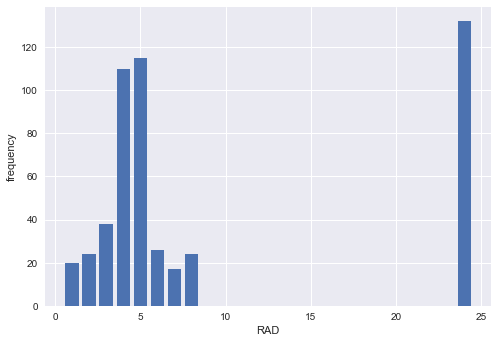

In [9]:
values, counts = val_counts.index, val_counts
plt.bar(values, counts)
plt.xlabel('RAD')
plt.ylabel('frequency')

##  Histograms

We can plot histogram for continuous valued attributes as well. We would have to select bin size to discretize the continuous valuesd data. Let's look at the distribution of <span style="font-family:Comic Sans MS">target</span> in the data.

(array([ 4., 17., 11., 20., 38., 34., 40., 75., 63., 63., 24., 18., 19.,
        14., 13., 13.,  7.,  2.,  2.,  6.,  3.,  1., 19.]),
 array([ 5.        ,  6.95652174,  8.91304348, 10.86956522, 12.82608696,
        14.7826087 , 16.73913043, 18.69565217, 20.65217391, 22.60869565,
        24.56521739, 26.52173913, 28.47826087, 30.43478261, 32.39130435,
        34.34782609, 36.30434783, 38.26086957, 40.2173913 , 42.17391304,
        44.13043478, 46.08695652, 48.04347826, 50.        ]),
 <a list of 23 Patch objects>)

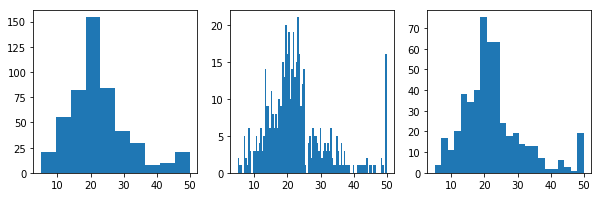

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].hist(df['target'])
ax[1].hist(df['target'], bins=100)
ax[2].hist(df['target'], bins='auto')

We could also plot the histogram directly from df:

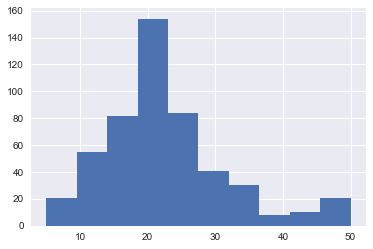

In [35]:
df['target'].hist()

##  Boxplots

#### Let's take a look at another popular way of visualizing and comparing data distribution for numerical attributes.

Let's load another dataset - IRIS: a flower dataset

In [8]:
from sklearn.datasets import load_iris

dataset_iris = load_iris()
iris = pd.DataFrame(dataset_iris.data, columns=dataset_iris.feature_names)
iris['target'] = dataset_iris.target

In [39]:
# data size
iris.shape

(150, 5)

In [9]:
# data schema
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0,0.5,'Values (in cm)')

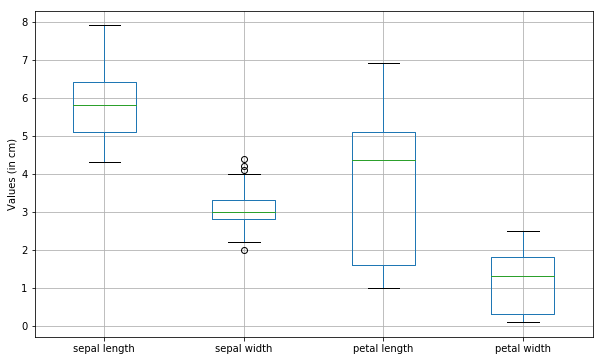

In [12]:
# comparing attributes
plt.figure(figsize=(10, 6))
iris[['sepal length', 'sepal width', 'petal length', 'petal width']].boxplot()
plt.ylabel('Values (in cm)')

In [13]:
iris['target'].unique()

array([0, 1, 2])

Text(0,0.5,'(petal width) Values (in cm)')

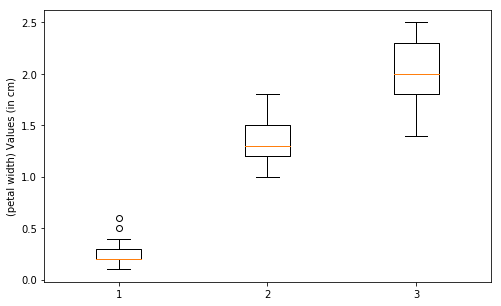

In [15]:
# comparing classes 
# let's take a look at the box plots of target for attribute "petal width"
plt.figure(figsize=(8, 5))
pw_0 = iris[iris['target'] == 0]['petal width']
pw_1 = iris[iris['target'] == 1]['petal width']
pw_2 = iris[iris['target'] == 2]['petal width']

plt.boxplot([pw_0, pw_1, pw_2])
plt.ylabel('(petal width) Values (in cm)')

##  Scatter plots

#### Scatter plots help us visualize data in 2D. 
Relationship between two attributes could be uncovered through scatter plots.

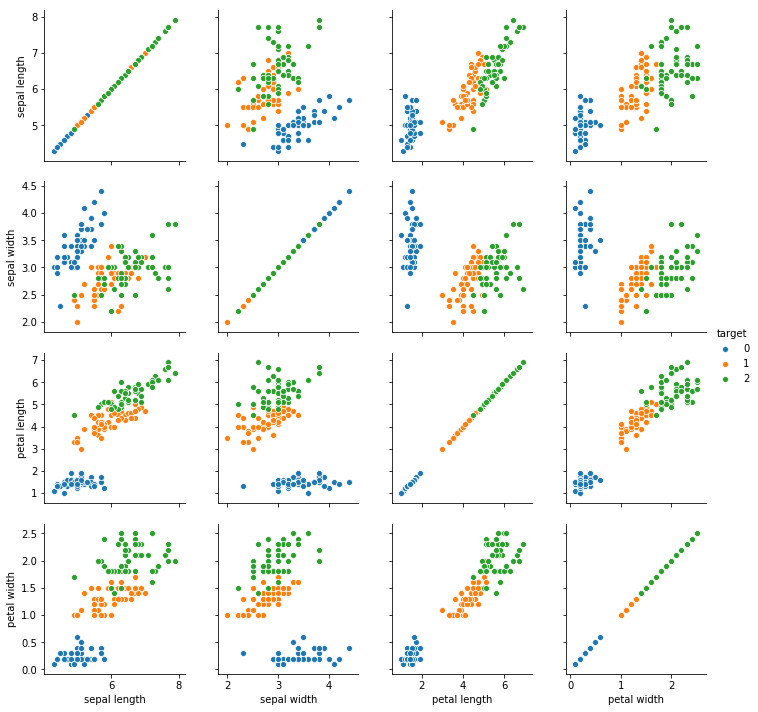

In [23]:
g = sns.pairplot(data=iris, hue='target', vars=['sepal length', 'sepal width', 'petal length', 'petal width'],
            diag_kind=None)# , plot_kws={'scatter_kws': {'alpha': 0.3}})
g.set(alpha=0.1)

## You can also use pandas to do this
#grr = pd.plotting.scatter_matrix(iris, c=iris['target], figsize=(15, 15), marker='o', s=60, alpha=.8)

Let's get back to Boston housing data again.

In [24]:
attributes = [c for c in df.columns if c not in ('target',)]

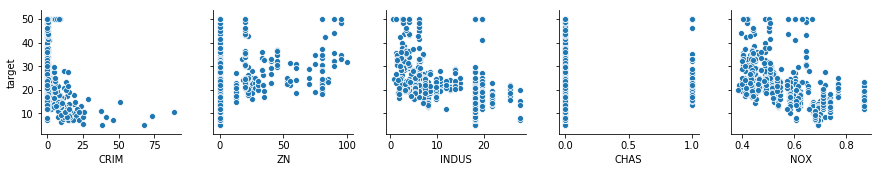

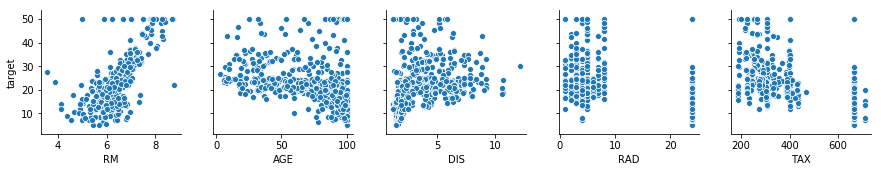

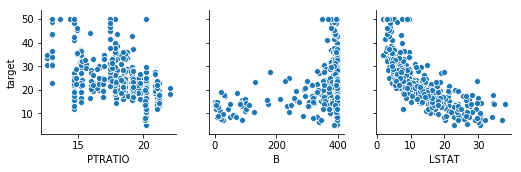

In [25]:
sns.pairplot(data=df, x_vars=attributes[:5], y_vars='target')
sns.pairplot(data=df, x_vars=attributes[5:10], y_vars='target')
sns.pairplot(data=df, x_vars=attributes[10:], y_vars='target')

##  Heatmaps
A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.

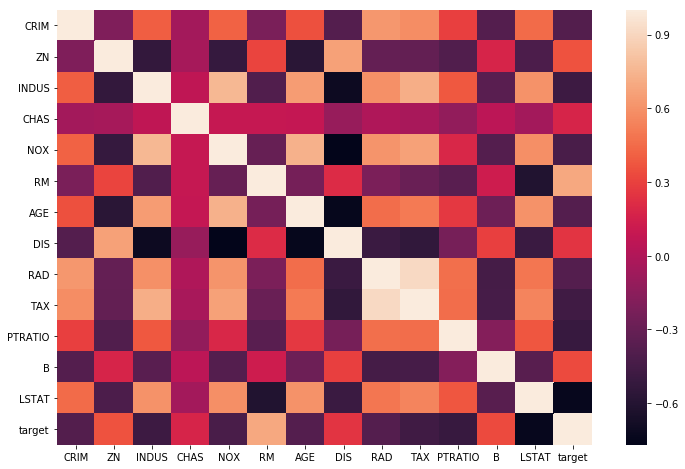

In [28]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 8))
# pass the axis to draw on
sns.heatmap(corr, ax=ax)

##  Parallel Coordinates

#### What if we would like to visualize more than 2D?  Parallel plots come to rescue!

In [27]:
from pandas.tools.plotting import parallel_coordinates  # pandas provides the method

/Users/lemanakoglu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


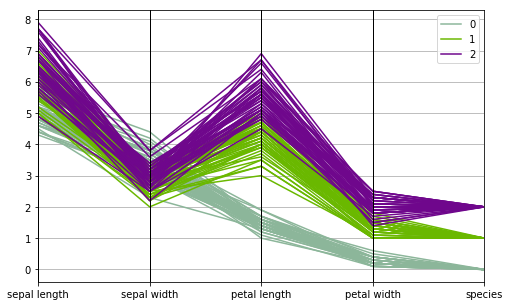

In [17]:
plt.figure(figsize=(8, 5))
iris['species'] = iris['target']
parallel_coordinates(iris, 'target')

##  Radar Plots

#### Another way to visualize data in >2D is to use radar plot. Python doesn't have a library for this. So we include below a block of code that can be used to plot radar plots for your convenience.

In [18]:
from math import pi

In [19]:
# let's just retain the columns we are interested in
iris = iris.drop('species', axis = 1)
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [20]:
type(iris['target'][0])

numpy.int64

In [21]:
num_samples = iris.shape[0]
num_samples

150

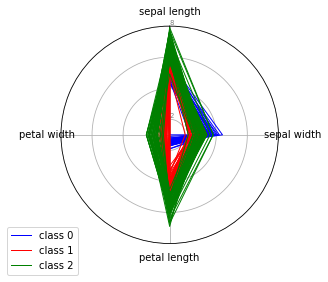

In [22]:
# ------- Setup the chart background
# number of variables
categories=[c for c in iris.columns if c not in ('target', 'species')]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2, 4, 6, 8], ['2', '4', '6', '8'], color="grey", size=7)
plt.ylim(1,8)

# plot data corresponding to each class
 
# Plot each individual = each line of the data
num_samples = iris.shape[0]
if_first = [True, True, True]
for i in range(num_samples):
    if iris.loc[i]['target'] == 0:
        # lines corresponding to target = 0
        values=iris.loc[i].drop('target').values.flatten().tolist()
        values += values[:1]
        if if_first[0]:
            ax.plot(angles, values, linewidth=1, linestyle='solid', color='b', label="class 0")
            if_first[0] = False
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='b')
        # ax.fill(angles, values, 'b', alpha=0.1) -- if you want to fill the plot
    
    elif iris.loc[i]['target'] == 1:
        # lines corresponding to target = 1
        values=iris.loc[i].drop('target').values.flatten().tolist()
        values += values[:1]
        if if_first[1]:
            ax.plot(angles, values, linewidth=1, linestyle='solid', color='r', label="class 1")
            if_first[1] = False
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='r')
    
    elif iris.loc[i]['target'] == 2:
        # lines corresponding to target = 2
        values=iris.loc[i].drop('target').values.flatten().tolist()
        values += values[:1]
        if if_first[2]:
            ax.plot(angles, values, linewidth=1, linestyle='solid', color='g', label="class 2")
            if_first[2] = False
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='g')
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


##  Contour Plots
It is used for visualizing a 3D surface in two dimensions. Each contour line consists of points with same constant value.

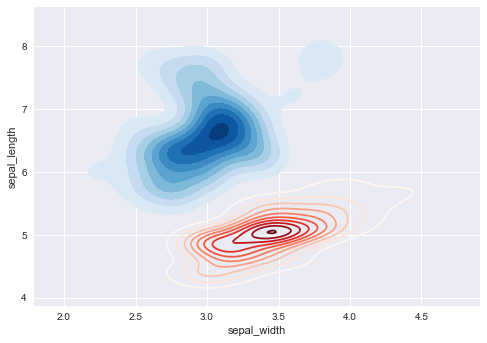

In [3]:
iris = sns.load_dataset("iris")
setosa = iris.loc[(iris.species == "setosa")]
virginica = iris.loc[(iris.species == "virginica")]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=False, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Data Transformations

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Feature scaling

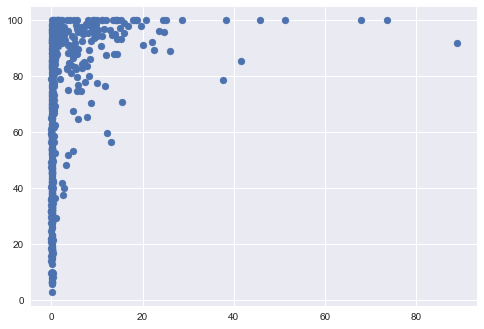

In [12]:
# from housing data
plt.scatter(df['CRIM'], df['AGE'])

In [21]:
# Essential imports
# imports for creating custom sklearn transformers
from sklearn.base import BaseEstimator, TransformerMixin

# imports for sklearn preprocessing transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [14]:
# standard scaler
df_s = pd.DataFrame(StandardScaler().fit_transform(df[['CRIM', 'AGE']]))
df_s.columns = ['CRIM', 'AGE']

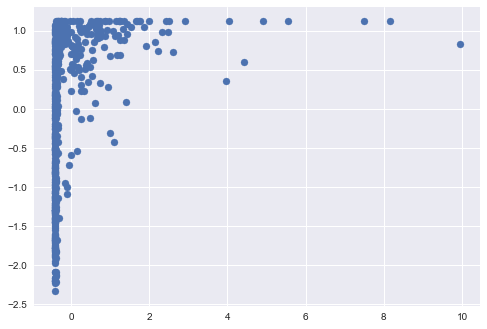

In [15]:
plt.scatter(df_s['CRIM'], df_s['AGE'])

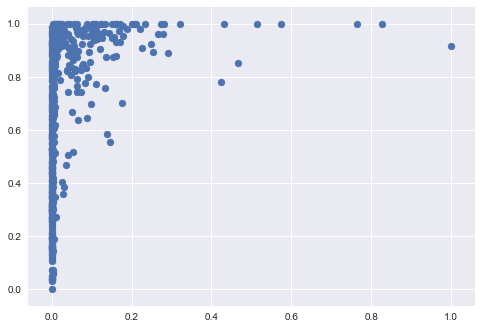

In [16]:
# MinMax scaler
df_mm = pd.DataFrame(MinMaxScaler().fit_transform(df[['CRIM', 'AGE']]))
df_mm.columns = ['CRIM', 'AGE']
plt.scatter(df_mm['CRIM'], df_mm['AGE'])

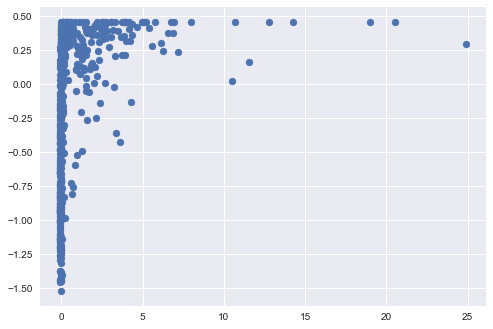

In [17]:
# robust scaler
df_rs = pd.DataFrame(RobustScaler().fit_transform(df[['CRIM', 'AGE']]))
df_rs.columns = ['CRIM', 'AGE']
plt.scatter(df_rs['CRIM'], df_rs['AGE'])

## Custom Transformer
You may encounter the need for a transformer that is not available in standard libraries. What should we do in such a scenario? We can create custom transformers with the desired functionality.

In [18]:
sample_df = df[['AGE']].sample(frac=0.1).reset_index()
sample_df.describe()

,index,AGE
count,51.000000,51.000000
mean,248.686275,71.935294
std,164.639666,27.783965
min,8.000000,6.000000
25%,99.500000,59.250000
50%,235.000000,83.000000
75%,402.500000,91.300000
max,505.000000,100.000000


In [19]:
# Setting some of the values to None
none_indices = [np.random.randint(len(sample_df)) for i in range(10)]
sample_df.loc[none_indices] = None

In [20]:
sample_df.describe()
# Note that count of age is reduced to 41

,index,AGE
count,41.000000,41.000000
mean,252.170732,69.973171
std,164.583247,27.673065
min,8.000000,6.200000
25%,104.000000,57.800000
50%,240.000000,80.800000
75%,401.000000,90.000000
max,505.000000,100.000000


In [218]:
# Transformer to impute missing values using mean of the column.
class MissingValueImputer(BaseEstimator,TransformerMixin):
      
    def __init__(self,col=None):
        self.mean =0
        self.col=col
    def transform(self ,X):
        X[self.col] = X[self.col].fillna(self.mean) 
        return X
    
    def fit(self, X, y=None):
        self.mean=X[self.col].mean()
        return self 

In [219]:
sample_df = MissingValueImputer('AGE').fit_transform(sample_df)

In [220]:
sample_df.head()

,index,AGE
0,NaN,77.173171
1,379.0,100.000000
2,181.0,62.200000
3,460.0,90.000000
4,271.0,16.300000


In [221]:
sample_df.describe()

,index,AGE
count,41.000000,51.000000
mean,268.829268,77.173171
std,161.543013,22.218425
min,9.000000,10.000000
25%,144.000000,77.173171
50%,237.000000,83.000000
75%,430.000000,90.650000
max,505.000000,100.000000


### Take-home Exercise: Implement custom box-cox transformer introduced in class.
Hint: You can use scipy.stats.boxcox function inside your transformer class. To verify that you've correctly implemented the transformer, transform the <span style="font-family:Comic Sans MS">box_df</span>

In [23]:
box_df = pd.DataFrame([45, 62, 85, 74, 90], columns=['value'])
box_df.head()

,value
0,45
1,62
2,85
3,74
4,90


In [29]:
results_df = pd.DataFrame([11.41640786, 13.74801575, 16.43908891, 15.20465053, 16.97366596]
                          , columns=['boxcox_transformed'])
results_df.head()

,boxcox_transformed
0,11.416408
1,13.748016
2,16.439089
3,15.204651
4,16.973666
